Scientific Computing: Exercise Series 5
Exercise 1: Error estimation
Generate a dataset of n = 1000 values {x1, ..., xn} drawn randomly from a log-normal distribution,
X ∼ Lognormal(µ, σ2), with µ = 1 and σ = 0.5. From those numbers, estimate the

a) arithmetic mean
b) median
c) standard deviation
d) variance
e) coefficient of variation (standard deviation divided by mean)

Compute the standard error of each of your estimates in a) – e) using bootstrapping, and report the
results using one of the two notations from the lecture (see slide “Error reporting”).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000
mu = 1
sigma = 0.5
bootstraps = 100000
results = np.zeros((bootstraps, 5))
for i in range(bootstraps):
    dataset = np.random.lognormal(mu, sigma, n)
    results[i][0] = np.mean(dataset)
    results[i][1] = np.median(dataset)
    results[i][2] = np.std(dataset)
    results[i][3] = np.var(dataset)
    results[i][4] = np.std(dataset) / np.mean(dataset)

print(f"The mean is: {np.mean(results, axis=0)[0]:.3g} \u00B1 {np.std(results, axis=0)[0]:.3g}")
print(f"The median is: {np.mean(results, axis=0)[1]:.3g} \u00B1 {np.std(results, axis=0)[1]:.3g}")
print(f"The standard deviation is: {np.mean(results, axis=0)[2]:.3g} \u00B1 {np.std(results, axis=0)[2]:.3g}")
print(f"The variance is: {np.mean(results, axis=0)[3]:.3g} \u00B1 {np.std(results, axis=0)[3]:.3g}")
print(f"The coefficient of variation is: {np.mean(results, axis=0)[4]:.3g} \u00B1 {np.std(results, axis=0)[4]:.3g}")

The mean is: 3.08 ± 0.0518
The median is: 2.72 ± 0.0537
The standard deviation is: 1.64 ± 0.0726
The variance is: 2.69 ± 0.24
The coefficient of variation is: 0.532 ± 0.0193


Repeat the analysis for different n ∈ [10, 10**4] and plot the standard errors for the different estimates
in a)–e) as a function of n using log-log axes.

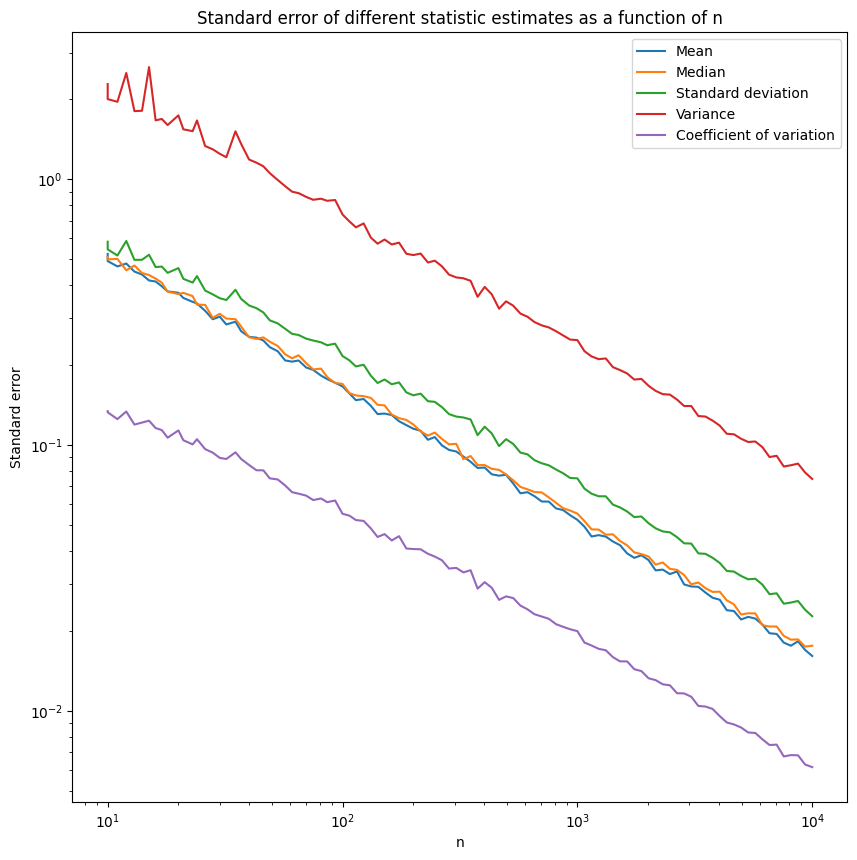

In [2]:
n = np.logspace(1, 4, 100, dtype=int)
mu = 1
sigma = 0.5
bootstraps = 1000
results = np.zeros((bootstraps, 5, len(n)))
for j in range(len(n)):
    for i in range(bootstraps):
        dataset = np.random.lognormal(mu, sigma, n[j])
        results[i][0][j] = np.mean(dataset)
        results[i][1][j] = np.median(dataset)
        results[i][2][j] = np.std(dataset)
        results[i][3][j] = np.var(dataset)
        results[i][4][j] = np.std(dataset) / np.mean(dataset)

plt.figure(figsize=(10, 10))
plt.loglog(n, np.std(results, axis=0)[0], label="Mean")
plt.loglog(n, np.std(results, axis=0)[1], label="Median")
plt.loglog(n, np.std(results, axis=0)[2], label="Standard deviation")
plt.loglog(n, np.std(results, axis=0)[3], label="Variance")
plt.loglog(n, np.std(results, axis=0)[4], label="Coefficient of variation")
plt.xlabel("n")
plt.ylabel("Standard error")
plt.legend()
plt.title("Standard error of different statistic estimates as a function of n")
plt.show()

What do you observe?

The standard error for all estimates decreases with increasing n. The standard error for the mean and the median are the smallest, while the standard error for the variance is the largest. The decrease of the standard error is not linear, but rather logarithmic, with roughly the same slope for all estimates in log-log space.

Exercise 2: Error propagation

Imagine you have three independently measured values x, y, z.
a) What is the relative condition number of calculating their average, m = mean{x, y, z}? Under which condition does this operation get ill-conditioned?

The relative condition number of calculating the average is given by:
$$\frac{\delta(m)}{m} = \sqrt{\frac{1}{3} \left(\frac{\delta(x)}{x}\right)^2 + \frac{1}{3} \left(\frac{\delta(y)}{y}\right)^2 + \frac{1}{3} \left(\frac{\delta(z)}{z}\right)^2}$$

The operation gets ill-conditioned if one of the values is very small, since then the relative error of the average will be dominated by the relative error of the small value.


b) Suppose that the three values represent the edge lengths of a box, and that each of them has been measured with different relative uncertainties: $$\frac{SE(x)}{x} = 10\%,
\frac{SE(y)}{y} = 20\%, \frac{SE(z)}{z} = 5\%$$. What is the standard error of the box volume, V = xyz?

In [4]:
U_x = 0.1
U_y = 0.2
U_z = 0.05
U_V = np.sqrt(U_x**2 + U_y**2 + U_z**2)
print(f"The uncertainty of the box volume is: {U_V:.3g}")

The uncertainty of the box volume is: 0.229


Exercise 3: Parameter sensitivity analysis
In this exercise, we do a parameter sensitivity analysis with the dynamic Lotka–Volterra predator–prey model from Exercise Series 3:
$$\frac{dR}{dt}(t) = \alpha R(t) - \beta R(t) F(t),  -\gamma F(t) + \delta R(t) F(t)$$
with the following parameters:
• R(t): population of rabbits (the prey) over time
• F(t): population of foxes (the predators) over time
• α: reproduction rate of rabbits
• β: rate at which foxes kill rabbits
• γ: fox mortality rate
• δ: reproduction rate of foxes relative to rabbit abundance

Take your program from Series 3, Exercise 1b, where you computed the solution R(t) and F(t) using the Runge–Kutta 4 method with initial populations R(0) = 1000, F(0) = 100. We now consider the case in which the four model parameters α, β, γ, δ are not known exactly, but only approximately. Measuring them more accurately is a lot of experimental work, so we would like to know which one we need to know the most precisely to obtain realistic simulation results.
Our goal is to precisely predict the fox population at time t = 1, so we define our model function as f(α, β, γ, δ) = F(1).
Compute the relative condition number of f with respect to the four parameters (κ_rel_α, κ_rel_β, κ_rel_γ, κ_rel_δ) numerically,
 at the estimated values α = 100, β = 1.5, γ = 10, δ = 0.01.
 Which of the four parameters is the model most sensitive to?
Hint: Estimate the relative condition numbers as:
$$\kappa_{rel, \alpha} = \left|\frac{\delta f}{\delta \alpha}\right| \left|\frac{\alpha}{f(\alpha,\beta,\gamma,\delta)}\right|~\left|\frac{f(\alpha+h,\beta,\gamma,\delta)-f(\alpha,\beta,\gamma,\delta)}{h} \frac{\alpha}{f(\alpha,\beta,\gamma,\delta)}\right|$$
and analogous for the other parameters. Use a small h.

In [18]:
def lotka_volterra(x, alpha, beta, gamma, delta):
    R, F = x
    return np.array([alpha * R - beta * R * F, -gamma * F + delta * R * F])

def runge_kutta_4(f, x0, t0, t1, h, alpha, beta, gamma, delta):
    x = x0
    t = t0
    x_rk4 = []
    t_rk4 = []
    while t < t1:
        k1 = f(x, alpha, beta, gamma, delta)
        k2 = f(x + h / 2 * k1, alpha, beta, gamma, delta)
        k3 = f(x + h / 2 * k2, alpha, beta, gamma, delta)
        k4 = f(x + h * k3, alpha, beta, gamma, delta)
        x = x + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        t = t + h
        x_rk4.append(x)
        t_rk4.append(t)
    return np.array(x_rk4), np.array(t_rk4)

def f(alpha, beta, gamma, delta):
    x0 = np.array([1000, 100])
    x_rk4, t_rk4 = runge_kutta_4(lotka_volterra, x0, 0, 1, h, alpha, beta, gamma, delta)
    F = x_rk4[-1, 1]
    return F

def df_dalpha(alpha, beta, gamma, delta):
    return (f(alpha + h, beta, gamma, delta) - f(alpha, beta, gamma, delta)) / h * alpha / f(alpha, beta, gamma, delta)

def df_dbeta(alpha, beta, gamma, delta):
    return (f(alpha, beta + h, gamma, delta) - f(alpha, beta, gamma, delta)) / h * beta / f(alpha, beta, gamma, delta)

def df_dgamma(alpha, beta, gamma, delta):
    return (f(alpha, beta, gamma + h, delta) - f(alpha, beta, gamma, delta)) / h * gamma / f(alpha, beta, gamma, delta)

def df_ddelta(alpha, beta, gamma, delta):
    return (f(alpha, beta, gamma, delta + h) - f(alpha, beta, gamma, delta)) / h * delta / f(alpha, beta, gamma, delta)

def kappa_rel_alpha(alpha, beta, gamma, delta):
    return np.abs(df_dalpha(alpha, beta, gamma, delta)) * np.abs(alpha / f(alpha, beta, gamma, delta)) * np.abs(df_dalpha(alpha, beta, gamma, delta))

def kappa_rel_beta(alpha, beta, gamma, delta):
    return np.abs(df_dbeta(alpha, beta, gamma, delta)) * np.abs(beta / f(alpha, beta, gamma, delta)) * np.abs(df_dbeta(alpha, beta, gamma, delta))

def kappa_rel_gamma(alpha, beta, gamma, delta):
    return np.abs(df_dgamma(alpha, beta, gamma, delta)) * np.abs(gamma / f(alpha, beta, gamma, delta)) * np.abs(df_dgamma(alpha, beta, gamma, delta))

def kappa_rel_delta(alpha, beta, gamma, delta):
    return np.abs(df_ddelta(alpha, beta, gamma, delta)) * np.abs(delta / f(alpha, beta, gamma, delta)) * np.abs(df_ddelta(alpha, beta, gamma, delta))

alpha = 100
beta = 1.5
gamma = 10
delta = 0.01
h = 0.01
x0 = np.array([1000, 100])
x_rk4, t_rk4 = runge_kutta_4(lotka_volterra, x0, 0, 1, h, alpha, beta, gamma, delta)
F = x_rk4[-1, 1]
print(f"The fox population at t = 1 is: {F:.3g}")
print(f"The relative condition number of f with respect to alpha is: {kappa_rel_alpha(alpha, beta, gamma, delta):.3g}")
print(f"The relative condition number of f with respect to beta is: {kappa_rel_beta(alpha, beta, gamma, delta):.3g}")
print(f"The relative condition number of f with respect to gamma is: {kappa_rel_gamma(alpha, beta, gamma, delta):.3g}")
print(f"The relative condition number of f with respect to delta is: {kappa_rel_delta(alpha, beta, gamma, delta):.3g}")


The fox population at t = 1 is: 41.8
The relative condition number of f with respect to alpha is: 3.45
The relative condition number of f with respect to beta is: 0.0693
The relative condition number of f with respect to gamma is: 0.114
The relative condition number of f with respect to delta is: 9e-06


The results show that the model is most sensitive to the parameter α.